# TIPS Complete

A data frame with 244 observations on the following 8 variables.


**total_bill:** a numeric vector, the bill amount (dollars)

**tip:**a numeric vector, the tip amount (dollars)

**sex:** factor with levels Female Male, gender of the payer of the bill

**smoker:** factor with levels No Yes, whether the party included smokers

**day:** factor with levels Friday Saturday Sunday Thursday, day of the week

**time:** factor with levels Day Night, rough time of day

**size:** numeric vector, number of people in party

In [1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

__plot__=False

import warnings
warnings.filterwarnings('ignore')

preview_window=2

def split_dataset(corr_value , target:str = 'PRICE' ):
    X = corr_value.drop(columns=[target]) # is a Matrix
    y = corr_value[target]
    print(X.head(preview_window))
    return X,y


def correlation_plot(df):
    print("Correlation analisys")
    corrmat = df.corr()
    plt.figure(figsize = (12, 10))
    sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});
    plt.show()
    print(corrmat.index.values)
    print(df.columns.T)
    return corrmat

def get_correlated_feature(df, corrdata, threshold):
    """Toglie variabili sotto soglia"""
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])

    corr_value = pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
    print(corr_value.T)
    print(corr_value.index.values)
    corr_value = df[corr_value.index]
    print(corr_value.head(preview_window))
    print(corr_value.shape)
    if __plot__:
        sns.pairplot(corr_value)
        plt.tight_layout()
        plt.show()

    # iniziamo a vedere gli outlier per capire se il dominio ha senso
    _ = correlation_plot(corr_value)
    
    return corr_value


def plot_45_correlated_data():
    """It works only on 0.45 threshold for fixed dimensions"""
    rows = 3
    cols = 2
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (12, 3))

    col = df.columns
    index = 0

    for i in range(rows):
        for j in range(cols):
            sns.regplot(x = df[col[index]], y = df['PRICE'], ax = ax[i][j])
            index = index + 1
    fig.tight_layout()

def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['PRICE'], axis = 1)
    y = corr_data['PRICE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 667)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred,y_test


total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
r2_adjusted_scores = []
mae_values = []
mse_values = []
rmse_values = []


def verifica_metriche(y_test,y_pred):

    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)
    adj_r2 = 1-(1-r2)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

    print(f'R2 score {r2}')
    print(f'MSE score {mse}')
    print(f'MAE score {mae}')
    print(f'RMSE score {rmse}') # Alto perchè il nostro modello sbaglia di 
                                # molto perchè abbiamo preso tutto il dataset, 
                                # forse abbiamo preso troppe variabili, anche variabili di "disturbo" 
    print('Adjusted_R2_score: ', adj_r2)
    return r2,mse,mae,rmse,adj_r2

def performance_metrics(features, th, y_true, y_pred):

    r2,mse,mae,rmse,adj_r2 = verifica_metriche(y_true, y_pred)

    total_features.append(len(features) - 1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(round(r2,2))
    r2_adjusted_scores.append(round(adj_r2,2))
    mae_values.append(round(mae,2))
    mse_values.append(round(mse,2))
    rmse_values.append(round(rmse,2))

    metrics_dataframe = pd.DataFrame(data=[total_features_name, total_features, selected_correlation_value,
                                           r2_scores, r2_adjusted_scores, mae_values, mse_values, rmse_values],
                                     index=['features name', '#feature', 'corr_value', 'R2', 'R2_adjusted', 'MAE', 'MSE', 'RMSE'])
    print('Performance Metrics')
    print(metrics_dataframe.T)
    

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
            count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81
tip         244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625  10.00
size        244.0   2.569672  0.951100  1.00   2.0000   2.000   3.0000   6.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage:

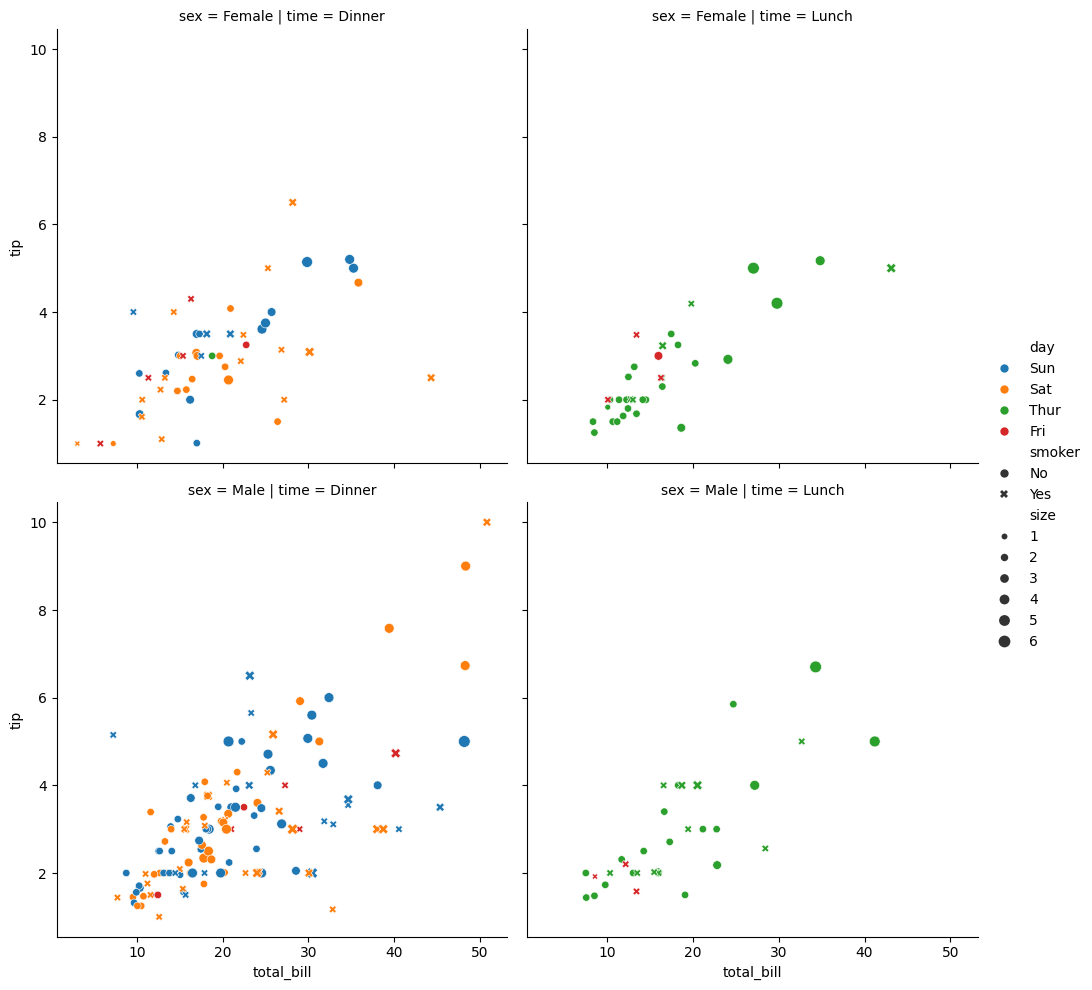

0.6093292708747633
[0.08046546 0.28084002]


In [3]:
tips = pd.read_csv('04-tips.csv')
print(tips.head(preview_window))
print(tips.describe().T)
# sns.set()
# tips = sns.load_dataset("tips")
# tips.head()
print(tips.info())
print(tips['smoker'].value_counts())

if __plot__:
    sns.countplot(x='smoker',data=tips,hue='smoker');
    plt.show()
    sns.countplot(x='sex',data=tips,hue='sex');
    plt.show()
    sns.countplot(x='day',data=tips,hue='day');
    plt.show()
    plt.figure(figsize=(9,6))
    sns.countplot(x='time',data=tips,hue='time');
    plt.show()
    sns.countplot(y='time',data=tips,hue='time');
    plt.show()
    sns.pairplot(tips,corner=True);
    plt.show()
    ## Categorical = 'sex', 'smoker' , 'day', 'time' , 'size'
    sns.pairplot(tips,hue='sex');
    plt.show()
    sns.pairplot(tips,hue='smoker');
    plt.show()
    sns.pairplot(tips,hue='day');
    plt.show()
    sns.pairplot(tips,hue='time');
    plt.show()
    sns.pairplot(tips,hue='size');
    plt.show()
    sns.relplot(x="total_bill", y="tip", hue="day", col="time", row="sex", data=tips);
    plt.show()
    sns.relplot(x="total_bill", y="tip",row="sex", col="time",hue="smoker", size="size",data=tips);
    plt.show()
    sns.relplot(x="total_bill", y="tip", hue="time",col="day", data=tips);
    plt.show()
    sns.relplot(x="total_bill", y="tip", hue="time",col="day", col_wrap=2, data=tips);
    plt.show()
    sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=tips,aspect=1);
    plt.show()
    sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", split=True, data=tips, aspect=1);
    plt.show()
    plt.figure(figsize=(9,5))
    sns.scatterplot(x="total_bill", y="tip", data=tips);
    plt.show()
    plt.figure(figsize=(9,5))
    sns.distplot(tips['tip']);
    plt.show()
    plt.figure(figsize=(9,5))
    sns.barplot(x="day", y="tip", data = tips,hue='day');
    plt.show()
    fig,ax =plt.subplots(1, 2, sharey=True, figsize=(9, 5))
    sns.boxplot(x="day", y="tip", data=tips, ax=ax[0],hue='day')
    sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=ax[1]);
    plt.show()
    plt.figure(figsize=(9,6))
    sns.regplot(x="total_bill", y="tip", data=tips);
    plt.show()
    sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg');
    plt.show()
    corr = tips.corr(numeric_only=True)
    print(corr)
    sns.heatmap(corr,annot=True);
    plt.show()
    

print("\n\n")
print("All Variables ------------------------")
sns.relplot(x="total_bill", y="tip", hue="day", col="time", row="sex", size="size",  style="smoker", data=tips);
plt.show()
    
df = tips.copy()
X = df[['total_bill','size']]
y = df['tip']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=667, test_size=0.3)



from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
b0 = model.intercept_ #intercept
b1 = model.coef_[0]  #total_bill
b2 = model.coef_[1]  #size
print(model.intercept_)
print(model.coef_)

In [ ]:
# cast string into numeric


In [ ]:
corrmat = correlation_plot(tips)

threshold = 0.0
target='tip'
corr_value = get_correlated_feature(tips , corrmat[target], threshold)
print(corr_value.T)

print(corr_value.head(preview_window))

y_pred,y_test = get_y_predict(corr_value)

performance_metrics(corr_value.columns.values, threshold, y_test, y_pred)